In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = 'ignore',category = FutureWarning)

In [ ]:
from PIL import Image
import os

folder_path = '/content/train/'  # Replace with the path to your image folder
zero_path = '/content/train/0/'
one_path = '/content/train/1/'

image_list = []  # List to store the loaded images

# Iterate through all files in the folder
for filename in os.listdir(zero_path):
    if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):  # Add more extensions if needed
        img = Image.open(os.path.join(zero_path, filename))
        image_list.append(img)
for file_name in os.listdir(one_path):
    if file_name.endswith(('.jpg', '.jpeg', '.png', '.bmp')):  # Add more extensions if needed
        img = Image.open(os.path.join(one_path, file_name))
        image_list.append(img)

In [ ]:
!ls /content/train

0  1


In [ ]:
train_set = '/content/train/'
test_set = '/content/test/'

In [ ]:
train_batch = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory = train_set, classes = ['no','yes'], batch_size = 10)
test_batch = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory = test_set, classes = ['no','yes'], batch_size = 10)

Found 1904 images belonging to 2 classes.
Found 241 images belonging to 2 classes.


In [ ]:
imgs,labels = next(train_batch)

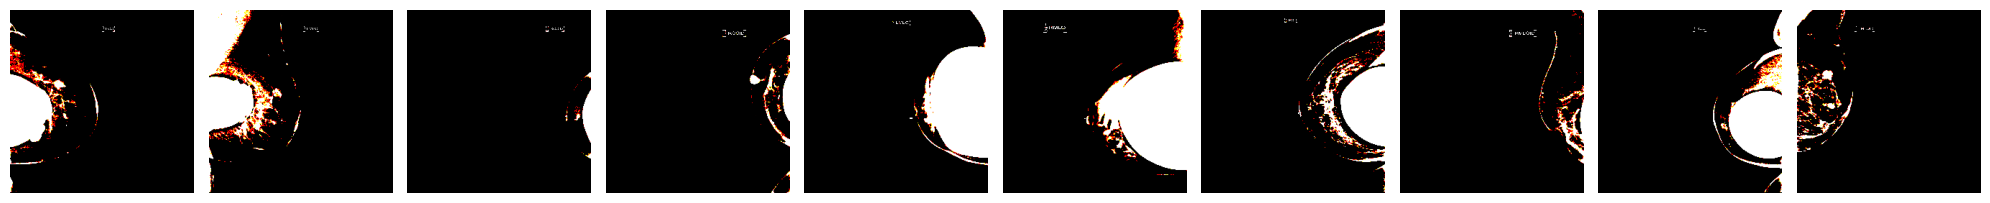

In [ ]:
fig,axes = plt.subplots(1,10,figsize = (20,20))
for img, ax in zip(imgs,axes.flatten()):
  ax.imshow(img)
  ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
model_first = Sequential([
    Conv2D(filters = 40, kernel_size = (3,3),activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Conv2D(filters = 80, kernel_size = (3,3),activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Flatten(),
    Dense(units = 2, activation = 'softmax')
])

In [ ]:
model_first.compile(optimizer = Adam(learning_rate = 0.00001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model_first.fit(x = train_batch,epochs = 10, verbose = 2)

Epoch 1/10
191/191 - 262s - loss: 0.9437 - accuracy: 0.9170 - 262s/epoch - 1s/step
Epoch 2/10
191/191 - 246s - loss: 0.1157 - accuracy: 0.9737 - 246s/epoch - 1s/step
Epoch 3/10
191/191 - 252s - loss: 0.0872 - accuracy: 0.9816 - 252s/epoch - 1s/step
Epoch 4/10
191/191 - 249s - loss: 0.0019 - accuracy: 0.9989 - 249s/epoch - 1s/step
Epoch 5/10
191/191 - 245s - loss: 2.1212e-05 - accuracy: 1.0000 - 245s/epoch - 1s/step
Epoch 6/10
191/191 - 247s - loss: 2.1726e-06 - accuracy: 1.0000 - 247s/epoch - 1s/step
Epoch 7/10
191/191 - 243s - loss: 1.5475e-06 - accuracy: 1.0000 - 243s/epoch - 1s/step
Epoch 8/10
191/191 - 253s - loss: 1.1689e-06 - accuracy: 1.0000 - 253s/epoch - 1s/step
Epoch 9/10
191/191 - 244s - loss: 9.1205e-07 - accuracy: 1.0000 - 244s/epoch - 1s/step
Epoch 10/10
191/191 - 248s - loss: 7.4258e-07 - accuracy: 1.0000 - 248s/epoch - 1s/step


In [ ]:
predictions = model_first.predict(x = test_batch,verbose = 0)

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
print(classification_report(test_batch.classes, np.argmax(predictions,axis = 1)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       238
           1       0.00      0.00      0.00         3

    accuracy                           0.98       241
   macro avg       0.49      0.50      0.50       241
weighted avg       0.98      0.98      0.98       241

